In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif,mutual_info_classif
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score,balanced_accuracy_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import time
df=pd.read_csv('mean_data.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,CLASS,NSP
0,252,1.213399,0.072473,-0.849126,0.377634,-0.978351,-1.304464,-0.222651,0.805802,-0.154134,-0.828378,-0.802710,6,1
1,738,1.068438,-3.660999,-2.354720,-1.503755,0.967588,-0.132138,-0.882861,0.591740,1.345747,-0.346750,-0.007154,2,1
2,868,1.881475,-3.642864,-0.771777,-0.922823,0.853488,1.022973,-0.352025,0.828647,-1.065434,-1.185671,-0.175735,2,1
3,1330,3.620823,1.115139,0.238179,0.190368,0.049322,1.401446,0.308535,-1.156985,0.285555,-0.507672,0.261899,7,2
4,1562,1.475338,-1.892178,-1.107670,0.747973,0.529871,0.683457,-0.311696,-0.042222,0.032792,0.123623,0.483177,1,1


In [29]:
df=df.iloc[:,1:]
df.head()

,0,1,2,3,4,5,6,7,8,9,10,CLASS,NSP
0,1.213399,0.072473,-0.849126,0.377634,-0.978351,-1.304464,-0.222651,0.805802,-0.154134,-0.828378,-0.802710,6,1
1,1.068438,-3.660999,-2.354720,-1.503755,0.967588,-0.132138,-0.882861,0.591740,1.345747,-0.346750,-0.007154,2,1
2,1.881475,-3.642864,-0.771777,-0.922823,0.853488,1.022973,-0.352025,0.828647,-1.065434,-1.185671,-0.175735,2,1
3,3.620823,1.115139,0.238179,0.190368,0.049322,1.401446,0.308535,-1.156985,0.285555,-0.507672,0.261899,7,2
4,1.475338,-1.892178,-1.107670,0.747973,0.529871,0.683457,-0.311696,-0.042222,0.032792,0.123623,0.483177,1,1


In [30]:
X=df.iloc[:,:11]
Y=df.iloc[:,11]

In [31]:
X.std()

0     2.399302
1     1.901893
2     1.307347
3     1.186794
4     1.099384
5     0.964001
6     0.857259
7     0.776926
8     0.720554
9     0.614085
10    0.568327
dtype: float64

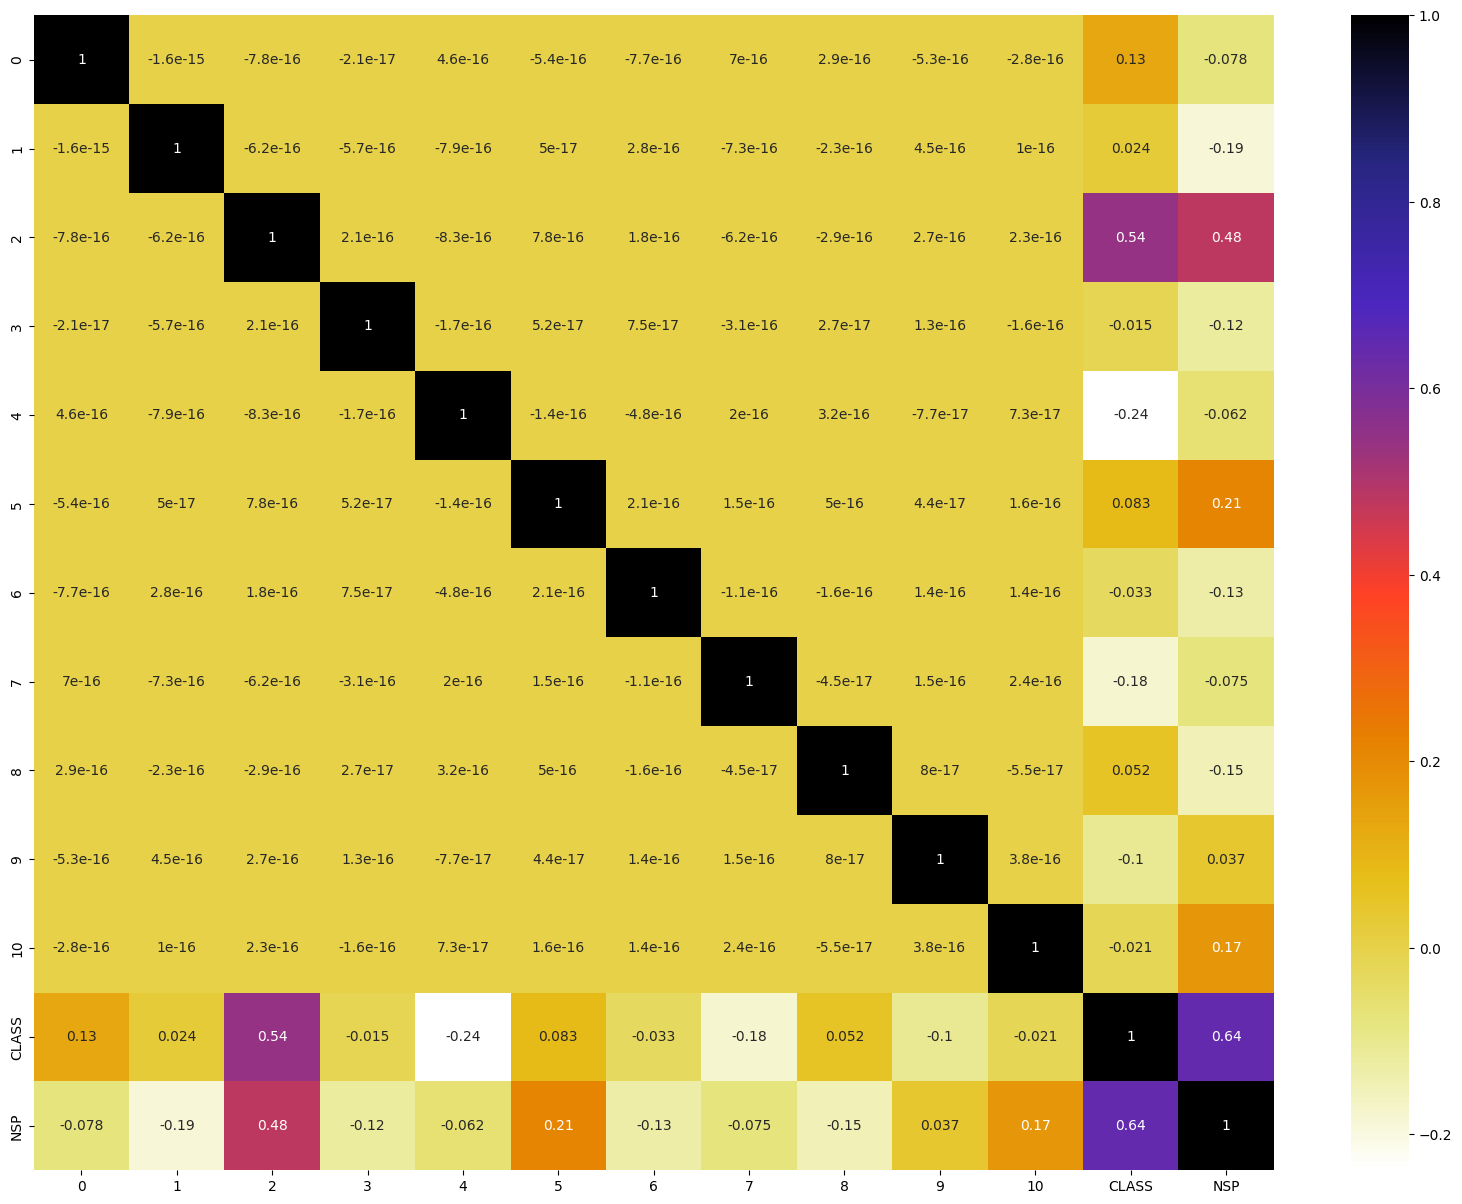

In [32]:
cor = df.corr()                   
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

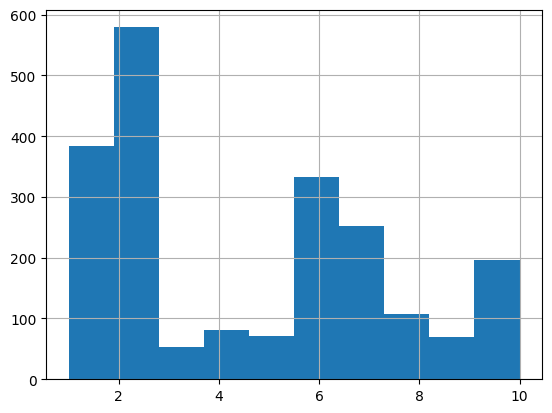

In [33]:
df['CLASS'].hist()      #παρατηρούμε πως έχουμε λίγες παρατηρήσεις στις κλάσεις 3-5
plt.show()

In [34]:
df=df.to_numpy()

In [53]:
selector=SelectKBest(mutual_info_classif,k=2) #keeping 40% of the total data variance with the just two compenents from PCA (31% +9%)
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Index(['0', '2'], dtype='object')

Prediction accuracy for the training dataset is:  49.4 %
Prediction accuracy for the testing dataset is:  50.5 %
Prediction balanced accuracy for the training dataset is:  34.1 %
Prediction balanced accuracy for the testing dataset is:  37.2 %
--------------- Confusion Matrix ---------------
[[27 39  0  0  0  2  0  0  0  8]
 [16 85  0  0  0 16  1  0  0  2]
 [ 1  8  0  0  0  0  0  0  0  0]
 [ 1 20  0  0  0  2  1  0  0  0]
 [ 7  2  0  0  0  0  0  0  0  5]
 [ 0 18  0  0  0 34  2  4  0  0]
 [ 0 11  0  0  0 21 18  2  0  0]
 [ 0  0  0  0  0  1  1 17  0  0]
 [ 4  1  0  0  0  0  0  0  0  8]
 [ 6  1  0  0  0  0  0  0  0 34]]
              precision    recall  f1-score   support

     class 1     0.4355    0.3553    0.3913        76
     class 2     0.4595    0.7083    0.5574       120
     class 3     0.0000    0.0000    0.0000         9
     class 4     0.0000    0.0000    0.0000        24
     class 5     0.0000    0.0000    0.0000        14
     class 6     0.4474    0.5862    0.5075        

C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

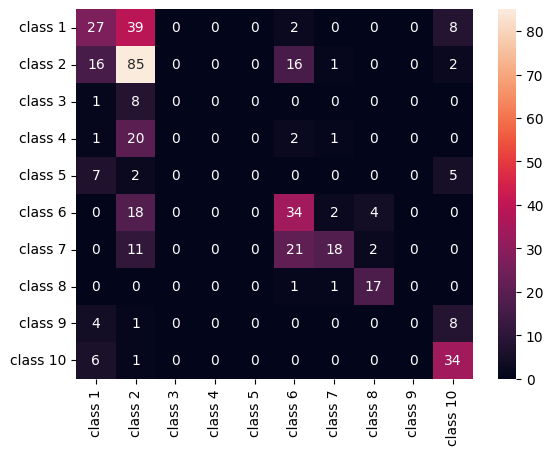

In [54]:
num_feats=df[:,[0,2]]
cat_feats=df[:,11]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")


print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [37]:
selector=SelectKBest(mutual_info_classif,k=3)
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Index(['0', '1', '2'], dtype='object')

Prediction accuracy for the training dataset is:  60.9 %
Prediction accuracy for the testing dataset is:  59.9 %
Prediction balanced accuracy for the training dataset is:  46.9 %
Prediction balanced accuracy for the testing dataset is:  47.3 %
--------------- Confusion Matrix ---------------
[[49 17  0  0  0  0  0  0  1  9]
 [13 86  0  0  0 13  5  0  0  3]
 [ 4  5  0  0  0  0  0  0  0  0]
 [ 0 13  0  8  0  3  0  0  0  0]
 [ 2  7  0  0  0  0  0  0  1  4]
 [ 0 18  0  0  0 37  0  3  0  0]
 [ 1 10  0  0  0 17 23  1  0  0]
 [ 0  0  0  0  0  3  1 15  0  0]
 [ 2  0  0  0  0  0  0  0  5  6]
 [ 6  1  0  0  0  0  0  0  2 32]]
              precision    recall  f1-score   support

     class 1     0.6364    0.6447    0.6405        76
     class 2     0.5478    0.7167    0.6209       120
     class 3     0.0000    0.0000    0.0000         9
     class 4     1.0000    0.3333    0.5000        24
     class 5     0.0000    0.0000    0.0000        14
     class 6     0.5068    0.6379    0.5649        

C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

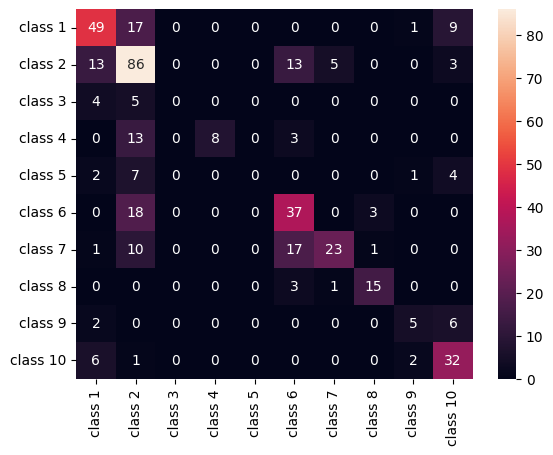

In [38]:
num_feats=df[:,[0,1,2]]
cat_feats=df[:,11]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")


print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [39]:
selector=SelectKBest(mutual_info_classif,k=4)
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Index(['0', '1', '2', '4'], dtype='object')

Prediction accuracy for the training dataset is:  68.8 %
Prediction accuracy for the testing dataset is:  68.8 %
Prediction balanced accuracy for the training dataset is:  52.5 %
Prediction balanced accuracy for the testing dataset is:  53.9 %
--------------- Confusion Matrix ---------------
[[ 53  10   0   0   0   1   3   0   1   8]
 [ 13 100   0   1   0   3   0   0   0   3]
 [  0   9   0   0   0   0   0   0   0   0]
 [  0  13   0   9   0   2   0   0   0   0]
 [  4   5   0   0   0   0   0   0   0   5]
 [  2   3   0   0   0  45   5   3   0   0]
 [  1   0   0   0   0  20  31   0   0   0]
 [  0   0   0   0   0   1   2  16   0   0]
 [  1   0   0   0   0   0   0   0   6   6]
 [  4   2   0   0   0   0   0   0   2  33]]
              precision    recall  f1-score   support

     class 1     0.6795    0.6974    0.6883        76
     class 2     0.7042    0.8333    0.7634       120
     class 3     0.0000    0.0000    0.0000         9
     class 4     0.9000    0.3750    0.5294        24
     

C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

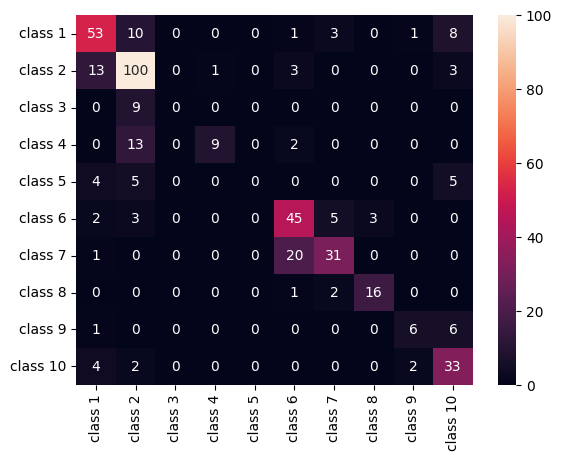

In [40]:
num_feats=df[:,[0,1,2,4]]   # παρατηρουμε πως ακομα και τωρα κερδιζουμε κοντα στο 10% με την προσθηκη μιας συνιστωσας!
cat_feats=df[:,11]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")


print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [41]:
selector=SelectKBest(mutual_info_classif,k=5)
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Index(['0', '1', '2', '4', '5'], dtype='object')

Prediction accuracy for the training dataset is:  72.9 %
Prediction accuracy for the testing dataset is:  74.4 %
Prediction balanced accuracy for the training dataset is:  58.4 %
Prediction balanced accuracy for the testing dataset is:  61.4 %
--------------- Confusion Matrix ---------------
[[ 54   9   0   0   0   1   3   0   0   9]
 [ 10 102   0   1   1   3   1   0   0   2]
 [  0   9   0   0   0   0   0   0   0   0]
 [  0  14   0   9   0   1   0   0   0   0]
 [  2   4   0   0   4   0   0   0   0   4]
 [  2   6   0   0   0  45   4   1   0   0]
 [  1   0   0   0   0   5  46   0   0   0]
 [  0   0   0   0   0   1   2  16   0   0]
 [  0   0   0   0   0   0   0   0   8   5]
 [  5   2   0   0   0   0   0   0   1  33]]
              precision    recall  f1-score   support

     class 1     0.7297    0.7105    0.7200        76
     class 2     0.6986    0.8500    0.7669       120
     class 3     0.0000    0.0000    0.0000         9
     class 4     0.9000    0.3750    0.5294        24
     

C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

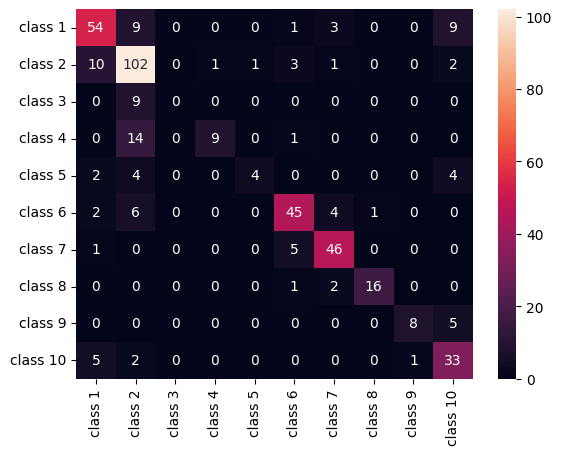

In [42]:
num_feats=df[:,[0,1,2,4,5]]
cat_feats=df[:,11]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")


print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [43]:
selector=SelectKBest(mutual_info_classif,k=6)
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Index(['0', '1', '2', '3', '4', '5'], dtype='object')

Prediction accuracy for the training dataset is:  78.1 %
Prediction accuracy for the testing dataset is:  77.7 %
Prediction balanced accuracy for the training dataset is:  67.8 %
Prediction balanced accuracy for the testing dataset is:  68.5 %
--------------- Confusion Matrix ---------------
[[ 58   5   1   0   0   2   2   0   2   6]
 [ 10 102   0   0   0   4   0   0   0   4]
 [  1   3   5   0   0   0   0   0   0   0]
 [  0  15   0   9   0   0   0   0   0   0]
 [  5   2   0   0   4   0   0   0   0   3]
 [  0   6   0   0   0  48   3   1   0   0]
 [  1   0   0   0   0   4  47   0   0   0]
 [  0   0   0   0   0   1   2  16   0   0]
 [  2   0   0   0   0   0   0   0   8   3]
 [  6   0   0   0   0   0   0   0   1  34]]
              precision    recall  f1-score   support

     class 1     0.6988    0.7632    0.7296        76
     class 2     0.7669    0.8500    0.8063       120
     class 3     0.8333    0.5556    0.6667         9
     class 4     1.0000    0.3750    0.5455        24
     

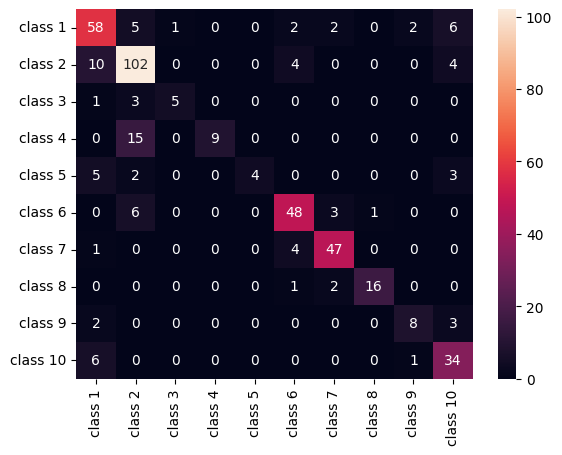

In [44]:
num_feats=df[:,[0,1,2,3,4,5]]    #βλεπουμε πως με την προσθηκη της '3' το f1-score για την 'κλαση 3' παυει να ειναι 0
cat_feats=df[:,11]         #δηλαδη η 3η συνιστωσα εδωσε την (υπολοιπη) απαραιτητη πληροφορια στον αλγοριθμο ωστε να αναγνωριζει στοιχεια της 3ης κλασσης

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")


print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [45]:
selector=SelectKBest(mutual_info_classif,k=7) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Index(['0', '1', '2', '3', '4', '5', '9'], dtype='object')

Prediction accuracy for the training dataset is:  82.2 %
Prediction accuracy for the testing dataset is:  78.9 %
Prediction balanced accuracy for the training dataset is:  69.7 %
Prediction balanced accuracy for the testing dataset is:  66.6 %
--------------- Confusion Matrix ---------------
[[ 60   5   2   0   0   2   2   0   0   5]
 [  8 108   0   0   0   2   0   0   0   2]
 [  4   1   4   0   0   0   0   0   0   0]
 [  0  15   0   9   0   0   0   0   0   0]
 [  6   2   0   0   3   0   0   0   0   3]
 [  1   5   0   0   0  49   3   0   0   0]
 [  0   0   0   0   0   5  47   0   0   0]
 [  0   0   0   0   0   0   3  16   0   0]
 [  2   0   0   0   0   0   0   0   7   4]
 [  6   0   0   0   1   0   0   0   1  33]]
              precision    recall  f1-score   support

     class 1     0.6897    0.7895    0.7362        76
     class 2     0.7941    0.9000    0.8438       120
     class 3     0.6667    0.4444    0.5333         9
     class 4     1.0000    0.3750    0.5455        24
     

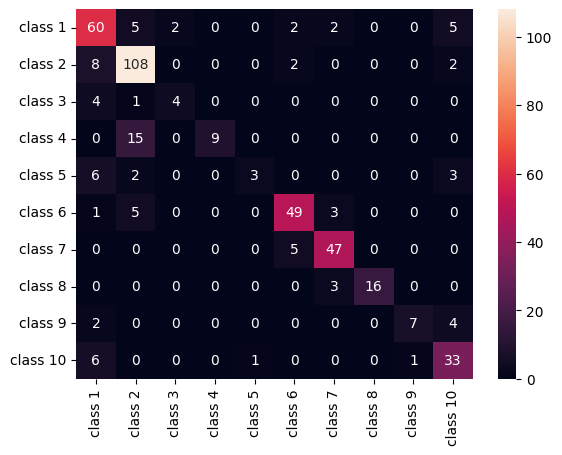

In [46]:
num_feats=df[:,[0,1,2,3,4,5,7]]  #η 7 αυξανει παραπανω την αποδοση απο την 9
cat_feats=df[:,11]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")


print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [47]:
selector=SelectKBest(mutual_info_classif,k=8)
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Index(['0', '1', '2', '3', '4', '5', '8', '9'], dtype='object')

Prediction accuracy for the training dataset is:  84.3 %
Prediction accuracy for the testing dataset is:  81.7 %
Prediction balanced accuracy for the training dataset is:  74.8 %
Prediction balanced accuracy for the testing dataset is:  71.2 %
--------------- Confusion Matrix ---------------
[[ 61   7   2   0   0   3   1   0   0   2]
 [  7 110   0   0   0   2   0   0   0   1]
 [  3   2   4   0   0   0   0   0   0   0]
 [  0  13   0  10   0   1   0   0   0   0]
 [  4   1   0   0   4   0   0   0   0   5]
 [  0   4   0   0   0  50   4   0   0   0]
 [  0   0   0   0   0   4  48   0   0   0]
 [  0   0   0   0   0   0   3  16   0   0]
 [  2   0   0   0   0   0   0   0  10   1]
 [  5   0   0   0   1   0   0   0   0  35]]
              precision    recall  f1-score   support

     class 1     0.7439    0.8026    0.7722        76
     class 2     0.8029    0.9167    0.8560       120
     class 3     0.6667    0.4444    0.5333         9
     class 4     1.0000    0.4167    0.5882        24
     

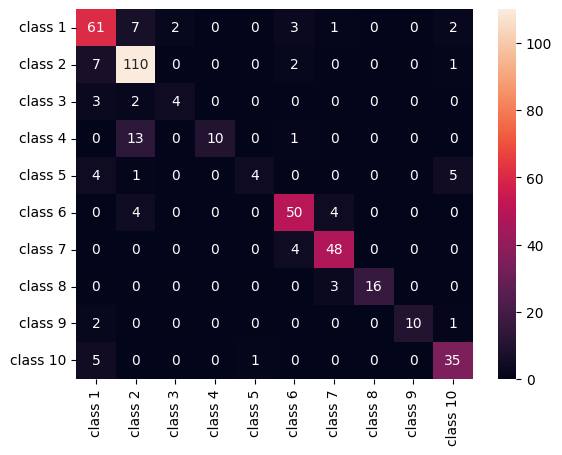

In [48]:
num_feats=df[:,[0,1,2,3,4,5,8,7]]
cat_feats=df[:,11]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")


print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [49]:
selector=SelectKBest(mutual_info_classif,k=9)
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Index(['0', '1', '2', '3', '4', '5', '8', '9', '10'], dtype='object')

Prediction accuracy for the training dataset is:  85.5 %
Prediction accuracy for the testing dataset is:  83.1 %
Prediction balanced accuracy for the training dataset is:  77.1 %
Prediction balanced accuracy for the testing dataset is:  72.9 %
--------------- Confusion Matrix ---------------
[[ 62   8   2   0   0   1   1   0   0   2]
 [  7 112   0   0   0   1   0   0   0   0]
 [  3   2   4   0   0   0   0   0   0   0]
 [  0  12   0  11   0   1   0   0   0   0]
 [  4   2   0   0   3   0   0   0   0   5]
 [  1   4   0   0   0  51   2   0   0   0]
 [  0   0   0   0   0   3  49   0   0   0]
 [  0   0   0   0   0   0   1  18   0   0]
 [  0   0   0   0   0   0   0   0  11   2]
 [  6   1   0   0   1   0   0   0   0  33]]
              precision    recall  f1-score   support

     class 1     0.7470    0.8158    0.7799        76
     class 2     0.7943    0.9333    0.8582       120
     class 3     0.6667    0.4444    0.5333         9
     class 4     1.0000    0.4583    0.6286        24
     

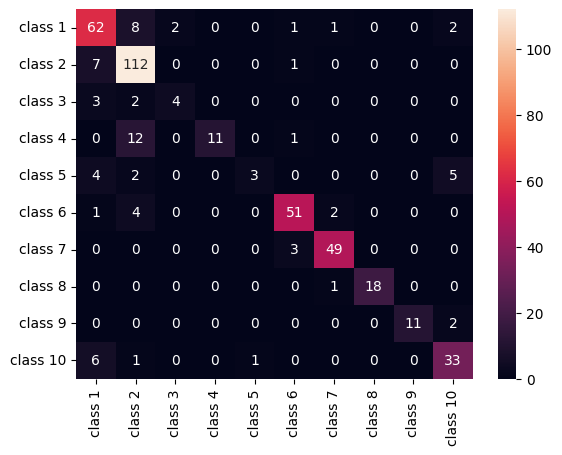

In [50]:
num_feats=df[:,[0,1,2,3,4,5,7,8,10]]
cat_feats=df[:,11]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")


print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [51]:
selector=SelectKBest(mutual_info_classif,k=10)
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Index(['0', '1', '2', '3', '4', '5', '7', '8', '9', '10'], dtype='object')

Prediction accuracy for the training dataset is:  88.4 %
Prediction accuracy for the testing dataset is:  83.8 %
Prediction balanced accuracy for the training dataset is:  79.6 %
Prediction balanced accuracy for the testing dataset is:  74.6 %
--------------- Confusion Matrix ---------------
[[ 65   4   2   0   0   1   1   0   0   3]
 [  6 113   0   0   0   0   1   0   0   0]
 [  3   1   5   0   0   0   0   0   0   0]
 [  0  13   0  11   0   0   0   0   0   0]
 [  5   0   0   0   4   0   0   0   0   5]
 [  1   7   0   0   0  47   3   0   0   0]
 [  1   0   0   0   0   0  51   0   0   0]
 [  0   0   0   0   0   0   1  18   0   0]
 [  2   0   0   0   0   0   0   0  11   0]
 [  7   1   0   0   1   0   0   0   0  32]]
              precision    recall  f1-score   support

     class 1     0.7222    0.8553    0.7831        76
     class 2     0.8129    0.9417    0.8726       120
     class 3     0.7143    0.5556    0.6250         9
     class 4     1.0000    0.4583    0.6286        24
     

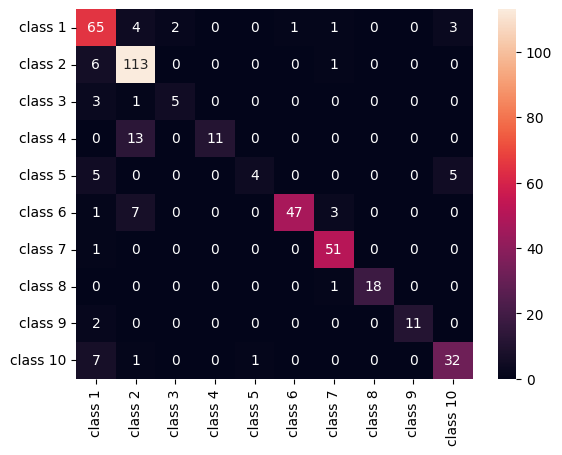

In [52]:
num_feats=df[:,:11] #με την προσθηκη της '6' οταν εχουμε ηδη τις υπολοιπες δεν προσφερει αποδοση στον αλγοριθμο
cat_feats=df[:,11]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")


print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)